# Transformations géométriques

Nous utilisons des transformations géométriques pour modifier la disposition spatiale des pixels dans une image. Ces transformations sont appelées transformations de feuille de caoutchouc car elles peuvent être considérées comme analogues à l'"impression" d'une image sur une feuille de caoutchouc, puis à l'étirement ou au rétrécissement de la feuille selon un ensemble de règles prédéfinies. Les transformations géométriques des images numériques consistent en deux opérations de base :

1. Transformation spatiale des coordonnées.
2. Interpolation de l'intensité qui attribue des valeurs d'intensité aux pixels transformés dans l'espace.

La transformation des coordonnées peut être exprimée comme suit
$$\begin{bmatrix}
x'\\
y'
\end{bmatrix}=\textbf{T}\begin{bmatrix}
x\\
y
\end{bmatrix}=\begin{bmatrix}
t_{11} &t_{12} \\
 t_{21}& t_{22}
\end{bmatrix}\begin{bmatrix}
x\\
y
\end{bmatrix}$$

où (x,y) sont les coordonnées des pixels de l'image originale et (x', y')  sont les coordonnées des pixels correspondants de l'image transformée.

Nous nous intéressons aux transformations dites affines, qui comprennent la mise à l'échelle, la translation, la rotation et le cisaillement. La caractéristique principale d'une transformation affine en 2D est qu'elle préserve les points, les lignes droites et les plans.

L'équation précédente peut être utilisée pour exprimer les transformations mentionnées ci-dessus, à l'exception de la translation, qui nécessiterait l'ajout d'un vecteur 2D constant au côté droit de l'équation. Cependant, il est possible d'utiliser des coordonnées homogènes pour exprimer les quatre transformations affines à l'aide d'une seule matrice $3×3$  sous la forme générale suivante :

$$\begin{bmatrix}
x'\\
y'\\
1
\end{bmatrix}=\textbf{M}\begin{bmatrix}
x\\
y\\
1
\end{bmatrix}=\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} &a_{22}  &a_{23} \\
 0&  0& 1
\end{bmatrix}\begin{bmatrix}
x\\
y\\
1
\end{bmatrix}$$

Cette transformation peut mettre à l'échelle, faire pivoter, translater ou cisailler une image, en fonction des valeurs choisies pour les éléments de la matrice $\textbf{M}$.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def afficher_image(image, titre):
    plt.imshow(image)
    plt.title(titre)
    plt.axis('off')
    plt.show()


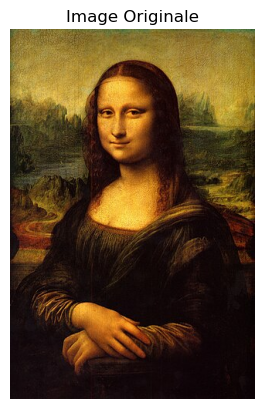

In [3]:
# Lire l'image BGR en utilisant OpenCV
chemin_image = "data/monalisa.jpg"
image_bgr = cv2.imread(chemin_image, cv2.IMREAD_COLOR)
# Convertir l'image BGR en RGB en réorganisant les canaux de couleur
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Afficher l'image originale en utilisant Matplotlib
afficher_image(image_rgb, "Image Originale")


# Traduire l'image
   La transformation de translation est utilisée pour déplacer l'image d'une distance spécifiée dans la direction x et y. Cette transformation est définie par la matrice  notée $M_{\text{translate}}$, comme suit:

   $$ M_{\text{translate}} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\
   0 & 0 & 1 \end{bmatrix}$$

   Où $t_x$ est la distance de translation sur l'axe x et $t_y$ est la distance de translation sur l'axe y.


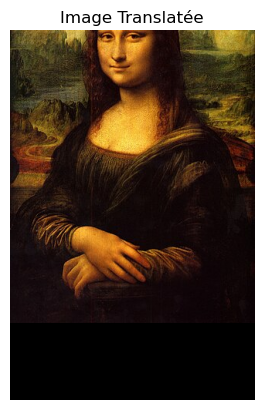

In [4]:

# Illustrer les différentes transformations géométriques
# Translation de l'image
M_translate = np.float32([[1, 0, 0], [0, 1, -100]])
image_translatee = cv2.warpAffine(image_rgb, M_translate, (image_rgb.shape[1], image_rgb.shape[0]))
afficher_image(image_translatee, "Image Translatée")

# Rotation de l'image
   La rotation est utilisée pour faire pivoter l'image autour d'un point spécifié, généralement le centre de l'image. Cette transformation est définie par une matrice de transformation de rotation, notée $M_{\text{rotate}}$, comme suit:

   $$ M_{\text{rotate}} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & (1-\cos(\theta)) \cdot c_x + \sin(\theta) \cdot c_y \\ \sin(\theta) & \cos(\theta) & -\sin(\theta) \cdot c_x + (1-\cos(\theta)) \cdot c_y   \\ 0 & 0 & 1
   \end
   {bmatrix} $$

   Où $\theta$ est l'angle de rotation en degrés et $(c_x, c_y)$ est le point de rotation autour duquel l'image est tournée.



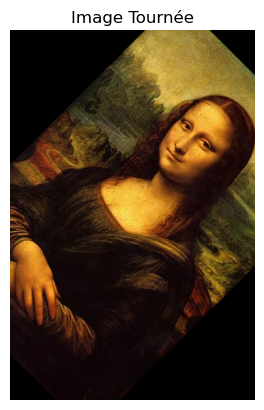

In [5]:
# Rotation de l'image
angle_rotation = -45
centre_rotation = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
M_rotate = cv2.getRotationMatrix2D(centre_rotation, angle_rotation, 1.0)
image_tournee = cv2.warpAffine(image_rgb, M_rotate, (image_rgb.shape[1], image_rgb.shape[0]))
afficher_image(image_tournee, "Image Tournée")

# Mise à l'échelle de l'image
   La mise à l'échelle est utilisée pour agrandir ou réduire la taille de l'image. Cette transformation est définie par des facteurs de mise à l'échelle $f_x$ et $f_y$, qui spécifient l'échelle sur les axes x et y respectivement. La matrice de transformation de mise à l'échelle, notée $M_{\text{scale}}$, est définie comme suit:

   $$M_{\text{scale}} = \begin{bmatrix} f_x & 0 & 0 \\ 0 & f_y & 0 \\
  0 & 0 & 1
   \end{bmatrix} $$

   En multipliant les coordonnées de chaque pixel de l'image par cette matrice, nous pouvons obtenir l'image mise à l'échelle.



Taille de limage : (480, 317, 3)
Nouvelle taille dimage : (336, 317, 3)


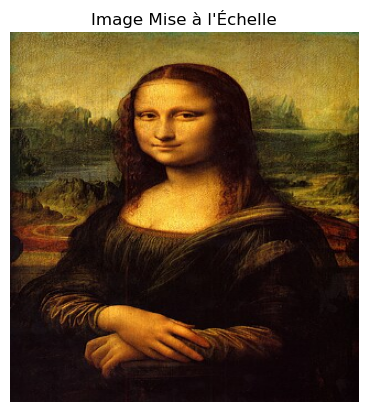

In [6]:
# Mise à l'échelle de l'image
fx, fy = 1,0.7
image_mise_echelle = cv2.resize(image_rgb, None, fx=fx, fy=fy)
print('Taille de limage :',image_rgb.shape)
print('Nouvelle taille dimage :',image_mise_echelle.shape)
afficher_image(image_mise_echelle, "Image Mise à l'Échelle")

# Cisaillement de l'image
   Le cisaillement est utilisé pour déformer l'image le long des axes x et y. Cette transformation est définie par des facteurs de cisaillement $s_x$ et $s_y$, qui spécifient l'inclinaison le long des axes x et y respectivement. La matrice de transformation de cisaillement, notée $M_{\text{shear}}$, est définie comme suit:

   $$M_{\text{shear}} = \begin{bmatrix} 1 & s_x & 0 \\ s_y & 1 & 0 \\
   0 & 0 & 1
   \end{bmatrix}$$

   En multipliant les coordonnées de chaque pixel de l'image par cette matrice, nous pouvons obtenir l'image cisaillée.

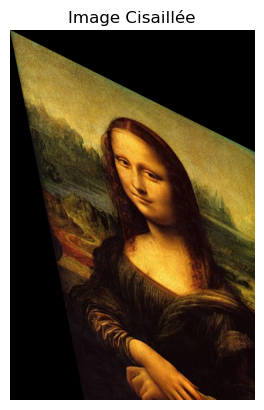

In [7]:


# Cisaillement de l'image
M_shear = np.float32([[1, 0.2, 0], [0.5, 1, 0]])
image_cisaillee = cv2.warpAffine(image_rgb, M_shear, (image_rgb.shape[1], image_rgb.shape[0]))
afficher_image(image_cisaillee, "Image Cisaillée")
